In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import modules %pylab inline
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
import librosa
from librosa import display
import tensorflow as tf

from keras.models import Sequential
from keras import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
l=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        l.append(filename)
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/respiratory-sound-database/demographic_info.txt
/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/filename_differences.txt
/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv
/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/filename_format.txt
/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/162_2b2_Ar_mc_AKGC417L.txt
/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/165_1b1_Ar_sc_Meditron.wav
/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Lr_mc_AKGC417L.wav
/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/213_1p2_Al_mc_AKGC417L.wav
/kaggle/input/resp

/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_2b2_Ar_mc_AKGC417L.txt
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/165_1b1_Ar_sc_Meditron.wav
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_1b2_Lr_mc_AKGC417L.wav
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/213_1p2_Al_mc_AKGC417L.wav
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/110_1p1_Ll_sc_Meditron.txt
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/160_1b2_Pr_mc_AKGC417L.wav
/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/219_2b2_Ar_mc_LittC2SE.txt
/kaggl

In [2]:
root = '/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files'
filenames = [s.split('.')[0] for s in os.listdir(path = root) if '.wav' in s]
#print(len(filenames))
filenames

['165_1b1_Ar_sc_Meditron',
 '162_1b2_Lr_mc_AKGC417L',
 '213_1p2_Al_mc_AKGC417L',
 '160_1b2_Pr_mc_AKGC417L',
 '146_8p3_Ar_mc_AKGC417L',
 '204_7p5_Ll_mc_AKGC417L',
 '181_1b1_Tc_mc_LittC2SE',
 '166_1p1_Ll_sc_Meditron',
 '223_1b1_Lr_sc_Meditron',
 '135_2b1_Ar_mc_LittC2SE',
 '168_1b1_Al_sc_Meditron',
 '106_2b1_Pr_mc_LittC2SE',
 '158_2p3_Tc_mc_AKGC417L',
 '207_3b2_Lr_mc_AKGC417L',
 '213_1p2_Ar_mc_AKGC417L',
 '203_1p2_Pr_mc_AKGC417L',
 '203_1p3_Al_mc_AKGC417L',
 '162_2b3_Pr_mc_AKGC417L',
 '107_3p2_Tc_mc_AKGC417L',
 '207_2b3_Pr_mc_AKGC417L',
 '198_1b5_Tc_mc_AKGC417L',
 '141_1b2_Pr_mc_LittC2SE',
 '198_6p1_Ll_mc_AKGC417L',
 '138_1p4_Pl_mc_AKGC417L',
 '186_2b4_Al_mc_AKGC417L',
 '151_2p3_Tc_mc_AKGC417L',
 '162_2b4_Pr_mc_AKGC417L',
 '151_2p2_Lr_mc_AKGC417L',
 '159_1b1_Ll_sc_Meditron',
 '151_2p2_Pl_mc_AKGC417L',
 '135_2b1_Tc_mc_LittC2SE',
 '205_3b4_Pr_mc_AKGC417L',
 '130_1p3_Tc_mc_AKGC417L',
 '186_2b3_Al_mc_AKGC417L',
 '165_1b1_Pl_sc_Meditron',
 '120_1b1_Al_sc_Meditron',
 '177_2b4_Pr_mc_AKGC417L',
 

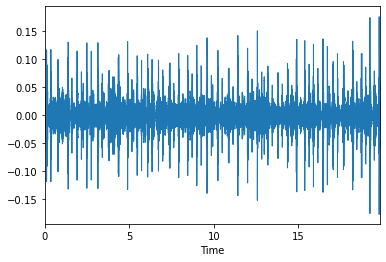

In [3]:
dir1='/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/'
#data, sampling_rate = librosa.load(root+'/'+'210_1b1_Al_sc_Meditron.wav', sr=44100 )
data, sampling_rate = librosa.load(root+'/'+filenames[0]+'.wav', sr=44100 )
display.waveplot(data, sr=sampling_rate)

In [4]:
f = open(dir1+"210_1b1_Al_sc_Meditron.txt", "r")
print(f.read())
pd.read_csv(dir1+"210_1b1_Al_sc_Meditron.txt", header = None).shape[0]

0.036	0.822	0	0
0.822	1.864	0	0
1.864	2.979	0	0
2.979	4.507	0	0
4.507	5.964	0	0
5.964	7.35	0	0
7.35	8.407	0	0
8.407	9.693	0	0
9.693	10.879	1	0
10.879	12.064	0	0
12.064	13.293	0	0
13.293	14.264	0	0
14.264	15.193	0	0
15.193	16.464	0	0
16.464	17.207	0	0
17.207	18.507	0	0
18.507	19.607	0	0
19.607	19.95	0	0



18

In [5]:
def lte(name):
    dir1='/kaggle/input/respiratory-sound-database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/'
    data, sampling_rate = librosa.load(dir1+name+'.wav', sr=44100 )
    cys=pd.read_csv(dir1+name+".txt", header = None).shape[0]
    #display.waveplot(data, sr=sampling_rate)
    return(data,cys)
    
xdat,ydat=[],[]
for i in range(len(filenames)):
    x,y=lte(filenames[i])
    xdat.append(x)
    ydat.append(y)

In [6]:
xdat

[array([-0.00247192, -0.00241089, -0.00222778, ...,  0.02233887,
         0.02246094,  0.02230835], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.01894081, 0.01925302,
        0.01881063], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.29708695, 0.2992134 ,
        0.29599464], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.0522505 , 0.05088544,
        0.04921448], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.05462003, 0.05486667,
        0.0565753 ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.02563918, 0.02294791,
        0.02299702], dtype=float32),
 array([ 0.00797498,  0.00808847,  0.00817108, ..., -0.00067234,
        -0.00058782, -0.00053179], dtype=float32),
 array([ 0.08627892,  0.09132155,  0.09528334, ..., -0.07246036,
        -0.04821378, -0.02633649], dtype=float32),
 array([0.1622482 , 0.18174197, 0.18839791, ..., 0.2968979 , 0.19271408,
        0.09217855], dtype=fl

In [7]:
xdat1 = pad_sequences(xdat, maxlen=2000, dtype='float', padding='post', truncating='post', value=0.)
ydat1=pd.Series(ydat)

xdat2 = xdat1[:,:,np.newaxis]
print(xdat2.shape)

(920, 2000, 1)


array([[[-2.47192383e-03],
        [-2.41088867e-03],
        [-2.22778320e-03],
        ...,
        [ 4.62646484e-02],
        [ 4.64172363e-02],
        [ 4.65698242e-02]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        ...,
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        ...,
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00]],

       ...,

       [[ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        ...,
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 2.34410732e-06],
        [ 1.58003252e-06],
        [ 3.84073871e-07],
        ...,
        [-1.04235500e-01],
        [-1.05404533e-01],
        [-1.06568106e-01]],

       [[-5.88403623e-07],
        [ 7.16542274e-07],
        [ 2.21818755e-06],
        ...,
        

In [ ]:
K.clear_session()
model = Sequential()

model.add(InputLayer(input_shape=xdat2.shape[1:]))
model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Conv1D(filters=50, kernel_size=10, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Flatten())
model.add(Dense(units=1, activation='softmax'))

opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

model.fit(xdat2, ydat1, batch_size=32, epochs=100)